In [90]:
try:
    import requests
except:
    print("If you read this message, it means you need to install the package requests by using pip3 install requests --user")
import numpy as np
import json
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Audio as play_wave
from IPython.display import display
import getpass
from sklearn.decomposition import PCA

csv_data="../data/CFdata.csv"

In [2]:

token= getpass.getpass("Please copy-paste your token from here https://developer.spotify.com/console/get-audio-features-several-tracks/ \n")
headers={"Authorization": "Bearer %s"%token}

Please copy-paste your token from here https://developer.spotify.com/console/get-audio-features-several-tracks/ 
········


# Data preparation
## Import CSV downloaded from google drive with Pandas

In [18]:
df=pd.read_csv(csv_data, delimiter=",")
df

,Artist,Songs,Youtube,Buccoli,Simeon,ema.inta,Fanio,Mori,Virginia,Sebastian,...,Nicola,Cecilia,Luca,Carmelo,Matteo,Paolo,Cedric,Davide,Phil,Dario
0,Icona Pop,I love it,https://www.youtube.com/watch?v=UxxajLWwzqY,2,1,2,2,1,2,2,...,1,2,1,2,2,1,1,1,2,1
1,Avicii Nicky Romero,I Could Be The One,https://www.youtube.com/watch?v=bek1y2uiQGA,0,2,1,0,0,1,1,...,1,0,-1,1,0,0,0,2,2,2
2,Alice Merton,Lash Out,https://www.youtube.com/watch?v=Sd6QnOR0T6c,1,0,2,0,2,1,0,...,1,2,0,0,2,0,0,0,2,0
3,Tame Impala,Eventually,https://youtu.be/Fkqu1DKyIX0,-1,0,0,2,0,0,0,...,0,0,2,0,-1,2,0,2,2,0
4,Arctic Monkeys,Arabella,https://youtu.be/Jn6-TItCazo,0,0,1,2,2,2,2,...,1,0,2,0,0,0,0,2,2,0
5,Franz Ferdinand,No You Girls,https://www.youtube.com/watch?v=25sBhhOR4lw&li...,0,0,2,0,0,2,2,...,0,2,2,2,1,1,0,0,2,2
6,The Killers,Mr. Brightside,https://www.youtube.com/watch?v=gGdGFtwCNBE,2,0,2,0,2,2,2,...,2,2,2,2,2,1,0,2,2,2
7,alt-J,Breezeblocks,https://www.youtube.com/watch?v=rVeMiVU77wo&li...,0,0,0,1,0,0,0,...,0,0,2,2,0,1,0,2,2,0
8,David Bowie,Let's Dance,https://www.youtube.com/watch?v=VbD_kBJc_gI,2,0,2,1,0,1,2,...,2,1,-1,2,1,2,1,0,2,2
9,George Ezra,Paradise,https://www.youtube.com/watch?v=XOwihbur34E,-1,2,1,0,2,0,0,...,0,2,2,0,0,0,0,1,2,0


## Separate people's names from tracks and rates
People are a list, tracks is a dataframe, rates is a matrix

In [104]:
people=df.columns[3:].tolist()
tracks=df.iloc[:,:2]
rates=df.iloc[:,3:].values.astype(np.float32)
print(people)
print(rates)
display(tracks)


['Buccoli', 'Simeon', 'ema.inta', 'Fanio', 'Mori', 'Virginia', 'Sebastian', 'Eleonora', 'Nicola', 'Cecilia', 'Luca', 'Carmelo', 'Matteo', 'Paolo', 'Cedric', 'Davide', 'Phil', 'Dario']
[[ 2.  1.  2.  2.  1.  2.  2.  2.  1.  2.  1.  2.  2.  1.  1.  1.  2.  1.]
 [ 0.  2.  1.  0.  0.  1.  1.  2.  1.  0. -1.  1.  0.  0.  0.  2.  2.  2.]
 [ 1.  0.  2.  0.  2.  1.  0.  0.  1.  2.  0.  0.  2.  0.  0.  0.  2.  0.]
 [-1.  0.  0.  2.  0.  0.  0.  0.  0.  0.  2.  0. -1.  2.  0.  2.  2.  0.]
 [ 0.  0.  1.  2.  2.  2.  2.  2.  1.  0.  2.  0.  0.  0.  0.  2.  2.  0.]
 [ 0.  0.  2.  0.  0.  2.  2.  2.  0.  2.  2.  2.  1.  1.  0.  0.  2.  2.]
 [ 2.  0.  2.  0.  2.  2.  2.  2.  2.  2.  2.  2.  2.  1.  0.  2.  2.  2.]
 [ 0.  0.  0.  1.  0.  0.  0.  2.  0.  0.  2.  2.  0.  1.  0.  2.  2.  0.]
 [ 2.  0.  2.  1.  0.  1.  2.  1.  2.  1. -1.  2.  1.  2.  1.  0.  2.  2.]
 [-1.  2.  1.  0.  2.  0.  0.  0.  0.  2.  2.  0.  0.  0.  0.  1.  2.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  2.  0.  0.  0. -1.  0. 

,Artist,Songs
0,Icona Pop,I love it
1,Avicii Nicky Romero,I Could Be The One
2,Alice Merton,Lash Out
3,Tame Impala,Eventually
4,Arctic Monkeys,Arabella
5,Franz Ferdinand,No You Girls
6,The Killers,Mr. Brightside
7,alt-J,Breezeblocks
8,David Bowie,Let's Dance
9,George Ezra,Paradise


# Get the ids of the tracks on Spotify and import their features

In [37]:
ids=[]
url="https://api.spotify.com/v1/search"

for i, track in tracks.iterrows():
    params={"q": "%s %s"%(track.Artist, track.Songs), "type": "track"}
    req=requests.get(url=url, params=params,headers=headers)
    assert req.status_code==200, req.content
    answer=req.json()
    items=answer["tracks"]["items"]
    first_result=items[0]
    ids.append(first_result["id"])
   
print(ids)

['2U8NXPTXZWG2O0ye2sYRiH', '1sh6lL6cmlcwhqZKGiKBua', '3hHsgoH0OOkIVsUBU3H4g6', '5M4yti0QxgqJieUYaEXcpw', '7nzsY8vlnKdvGOEE0rjAXZ', '4VP8QiCeaZq8BeTIUrMQOG', '7d8GetOsjbxYnlo6Y9e5Kw', '7gARZ2i5u5DHC1b1n1fML5', '3ix6K4wZY29bCujrSznwFZ', '38zwkK6TtTjIW9tpYBfZ3D', '305tGJy16yTTFe6Ya9nMKJ', '68IBz8C8oFUIVC4Xgf0f0g', '5fpj84RsT9cOTfWUCxBTXu', '39rHfrVqCX6A55GF7uOZSC', '2Fxmhks0bxGSBdJ92vM42m', '1ySdjlU5Vc24w81xam2MHR']


In [56]:
url="https://api.spotify.com/v1/audio-features"
params={"ids":",".join(ids)}
req=requests.get(url=url, params=params, headers=headers)
audio_features=req.json()["audio_features"]
df_features=pd.DataFrame(audio_features)


In [66]:
columns_fts=['acousticness', 'danceability', 'energy',  'instrumentalness', 'liveness', 'loudness',  
                    'tempo', 'valence']
features=df_features.loc[:, columns_fts].values

# Let's summarize

In [105]:
print("We have %d people who rated %d songs"%(len(people),tracks.shape[0]))
print("Indeed, the shape of our rating matrix is %s"%(str(rates.shape)))
print("For each track we extracted %d features from Spotify leading to a matrix shaped %s"%(len(columns_fts),str(features.shape)))

We have 18 people who rated 16 songs
Indeed, the shape of our rating matrix is (16, 18)
For each track we extracted 8 features from Spotify leading to a matrix shaped (16, 8)


Now what can we do about it? First, we can use Principal Component Analysis techniques to reduce the feature-space of songs from 8 dimensions to 2 dimensions, drawn as those who best fits the data in features

In [99]:
pca_ft=PCA(n_components=2, whiten=True)
features_2=pca_ft.fit_transform(features)

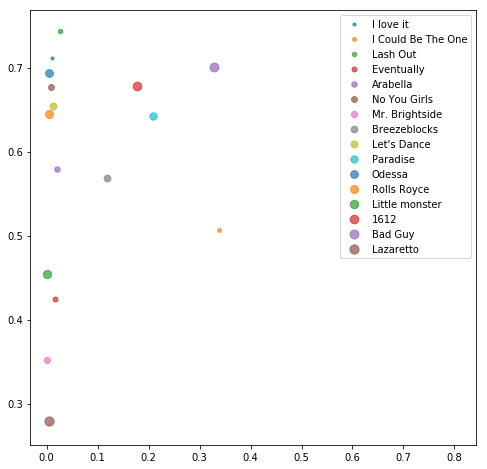

In [81]:
plt.figure(figsize=(8,8))
for i, track in tracks.iterrows():
    plt.scatter(features[i,0], features[i,1], s=10+5*i, alpha=0.7p, label=track.Songs)
plt.legend()
range_x=features[:,0].max()-features[:,0].min()
plt.xlim([features[:,0].min()-range_x/10, features[:,0].max()+1.5*range_x])
plt.show()

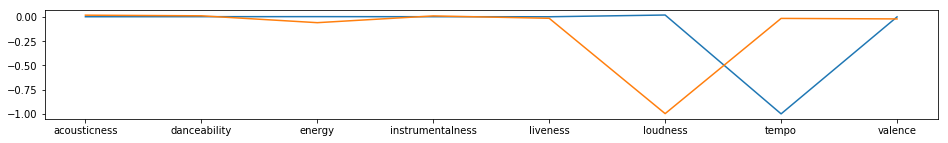

In [100]:
plt.figure(figsize=(16,2))
for component in pca_ft.components_:
    plt.plot(component)
plt.xticks(np.arange(len(columns_fts)), columns_fts)
plt.show()

In [106]:
pca_trackpeople=PCA(n_components=2, whiten=True)
tracks_2=pca_trackpeople.fit_transform(rates)

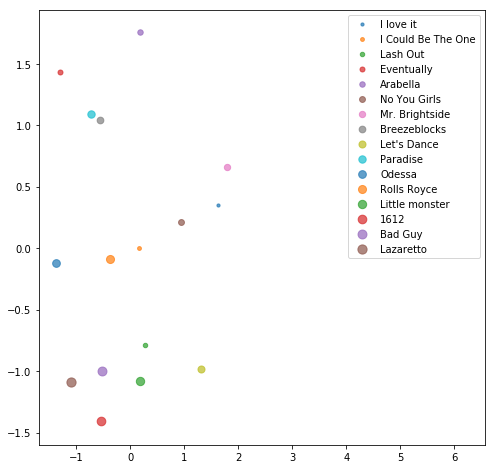

In [107]:
plt.figure(figsize=(8,8))
for i, track in tracks.iterrows():
    plt.scatter(tracks_2[i,0], tracks_2[i,1], s=10+5*i, alpha=0.7, label=track.Songs)
plt.legend()
range_x=tracks_2[:,0].max()-tracks_2[:,0].min()
plt.xlim([tracks_2[:,0].min()-range_x/10, tracks_2[:,0].max()+1.5*range_x])
plt.show()

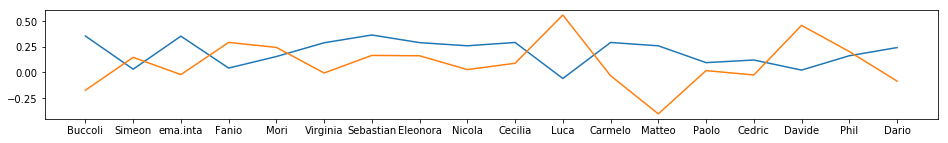

In [108]:
plt.figure(figsize=(16,2))
for component in pca_trackpeople.components_:
    plt.plot(component)
plt.xticks(np.arange(len(people)), people)
plt.show()

In [109]:
pca_peopletrack=PCA(n_components=2, whiten=True)
people_2=pca_peopletrack.fit_transform(rates.T)

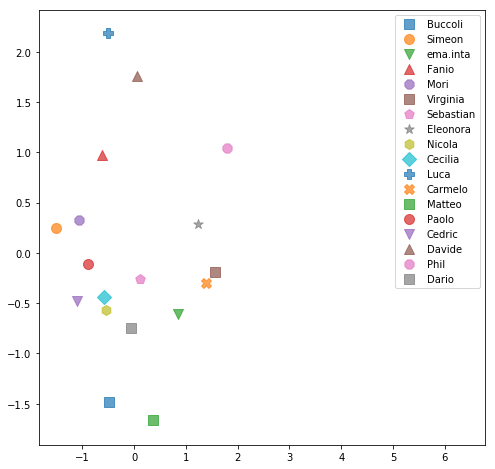

In [122]:
plt.figure(figsize=(8,8))
markers=",ov^8sp*hDPX"

for p, person in enumerate(people):
    plt.scatter(people_2[p,0], people_2[p,1], s=100, alpha=0.7, marker=markers[p%len(markers)], label=person)
plt.legend()
range_x=people_2[:,0].max()-people_2[:,0].min()
plt.xlim([people_2[:,0].min()-range_x/10, people_2[:,0].max()+1.5*range_x])
plt.show()

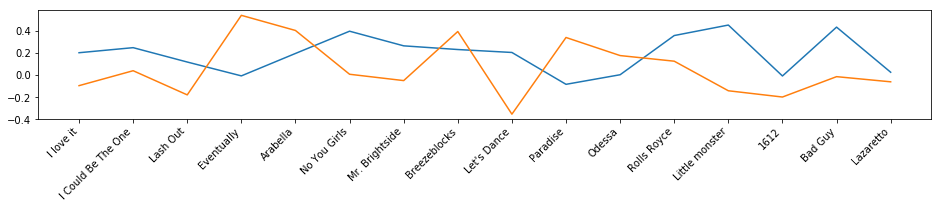

In [128]:
plt.figure(figsize=(16,2))
for component in pca_peopletrack.components_:
    plt.plot(component)
plt.xticks(np.arange(len(tracks.Songs)), tracks.Songs, rotation=45, ha="right")
plt.show()